<h3>Context:</h3>

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.

<h3>Objective:</h3>

The Goal is to explore the data and pre-process it for future use in any predictive analytics study.

<h3>Questions:-</h3>
    
<h4>1. Import required libraries and read the dataset.</h4>

In [3]:
#importing the required libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the dataset and naming it as df.
df = pd.read_csv('Apps_data.csv')

<h4>2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.</h4>

In [5]:
# Calculating top 5 Rows of the dataset.
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Calculating bottom 5 Rows of the dataset.
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
# Basic information about data and it's types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# Calculating number of rows & columns.
df.shape

(10841, 13)

<h4>3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.</h4>

In [9]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
#Calculating the statistics for all the features
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
"""The Features that are required to be worked upon for model building are : """
print("1. Rating")
print("2. Type")
print("3. Content Rating")
print("4. Price")
print("5. Category")
print("6. Reviews")

1. Rating
2. Type
3. Content Rating
4. Price
5. Category
6. Reviews


<h4>4. Check if there are any duplicate records in the dataset? if any drop them.</h4>

In [12]:
#Finding duplicate Records.
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [13]:
# Dropping all the duplicate records in the data
df.drop_duplicates(inplace=True)

In [14]:
# Checking the shape of the data
df.shape

(10358, 13)

<h4>5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.
</h4>

In [15]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [16]:
#Filtering the unique category using query function
index = df.query('Category == "1.9"')
index

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
#Dropping of the unique category
df.drop(10472, inplace=True)

In [18]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<h4>6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)</h4>

In [19]:
# Values missing are 1465
df['Rating'].isnull().sum()

1465

In [20]:
#Finding indexes records with missing ratings
blank_rating = df.query('Rating.isnull()').index

In [21]:
blank_rating

Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,   185,
       ...
       10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835, 10838],
      dtype='int64', length=1465)

In [22]:
##Dropping off records with missing rating
df.drop(blank_rating,inplace=True)

In [23]:
df.shape

(8892, 13)

In [24]:
#using np.where function from numpy to define a condition
df['Rating_Category'] = np.where(df['Rating'] > 3.5, 'high', 'low')

In [25]:
#checking the above values with the condition
df.query('Rating < 3.5').head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,low


In [26]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high


<h4>7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.
</h4>

In [27]:
#Distribution of Rating_category
df['Rating_Category'].value_counts()

Rating_Category
high    8012
low      880
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Rating Category')

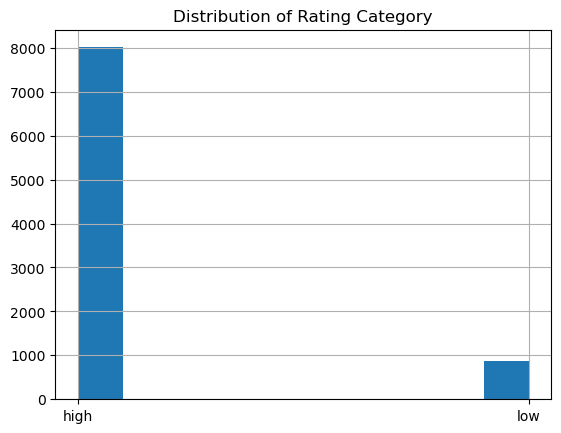

In [28]:
#plotting a histogram to see the distribution
df['Rating_Category'].hist()
plt.title("Distribution of Rating Category")

<h4>8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)</h4>

In [29]:
df['Reviews'].dtype

dtype('O')

In [30]:
# Converting to suitable datatype
df['Reviews'] = df['Reviews'].astype(int)

In [31]:
df['Reviews'].dtype

dtype('int32')

In [32]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int32

In [33]:
df['Reviews'].describe()

count    8.892000e+03
mean     4.727764e+05
std      2.905052e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.714500e+03
75%      7.126675e+04
max      7.815831e+07
Name: Reviews, dtype: float64

<Axes: xlabel='Reviews'>

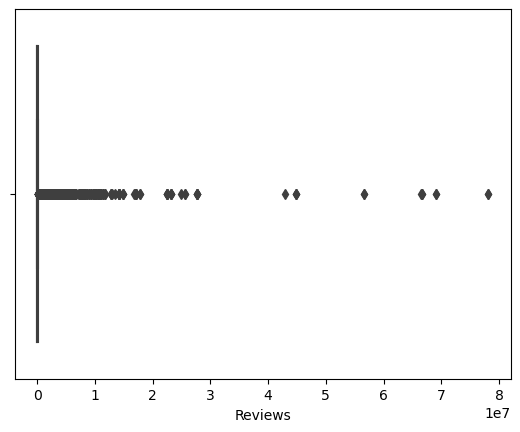

In [34]:
sns.boxplot(data=df, x='Reviews')

In [35]:
# Applying Log Transformation to the column using Log
log = np.log(df['Reviews'])

In [36]:
log.describe()

count    8892.000000
mean        8.234893
std         3.880200
min         0.000000
25%         5.099866
50%         8.458398
75%        11.174185
max        18.174247
Name: Reviews, dtype: float64

Text(0.5, 1.0, 'Box plot after log transformation')

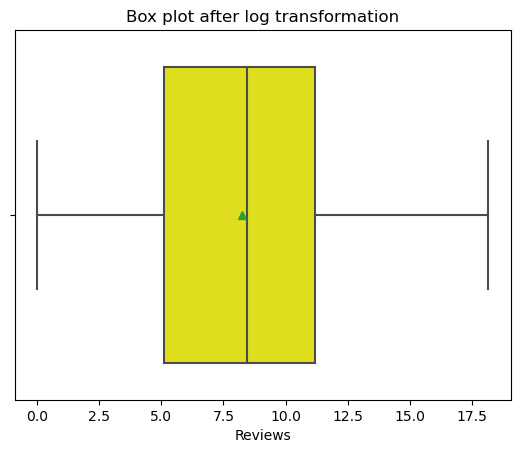

In [37]:
# Plotting a boxplot to Analyze any Outliers
sns.boxplot(x=log, color='yellow', showmeans=True)
plt.title("Box plot after log transformation")

In [38]:
# Replacing reviews values with their transformed values.
df['Reviews'] = log

In [39]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high


<h4>9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')</h4>

In [40]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [41]:
#dropping rows with size as 'Varies with device'
df.drop(df.query('Size == "Varies with device"').index, inplace=True)

In [42]:
len(df.query('Size == "Varies with device"'))

0

In [43]:
#converting M to 1000000 and k to 1000
num = {'M':1000000,'k':1000}

df['Size'] = (df['Size'].str[0:-1].astype(float)*df['Size'].str[-1].replace(num)).astype(float)

In [44]:
df['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

<h4> 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type. </h4>

In [45]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [46]:
#Replacing the Unwanted Characters in the dataset 
df['Installs'] = df['Installs'].str.replace(",","")

In [47]:
df['Installs'] = df['Installs'].str.replace("+","")

In [48]:
#Converting to suitable datatype using pd.to_numeric
df['Installs'] = pd.to_numeric(df['Installs'])

In [49]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int64

In [50]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high


<h4>11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.</h4>

In [51]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: object

In [52]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [53]:
df['Price'] = df['Price'].str.replace("$","")

In [54]:
df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [55]:
df['Price'] = pd.to_numeric(df['Price'])

In [56]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7424, dtype: float64

<h4>12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)</h4>

In [57]:
#Getting all the columns of the dataset.
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_Category'],
      dtype='object')

In [58]:
# Dropping the redundant columns from the datset.
df.drop(["App","Rating","Genres","Last Updated","Current Ver","Android Ver"], axis = 1,inplace = True)

In [59]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,high


<h4> 13. Encode the categorical columns </h4>

- To encode the categorical columns, we have opted for the LabelEncoder method. 
  This choice was made due to the substantial number of unique values present in each feature. 
    Using alternative encoding methods could result in a dataset that is not only voluminous but also challenging to comprehend and interpret. 
    Therefore, the LabelEncoder method was selected for its efficiency in handling large categorical datasets, ensuring a more manageable and 
    interpretable representation.

In [60]:
# Importing Label Encoder in order to perform label encoding
from sklearn.preprocessing import LabelEncoder

In [61]:
labelencoder = LabelEncoder() #creating the object of class

In [62]:
#running the loop on all the columns with object type and applying labelencoding on them
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = labelencoder.fit_transform(df[col]) 

In [63]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,0,5.068904,19000000.0,10000,0,0.0,1,0
1,0,6.874198,14000000.0,500000,0,0.0,1,0
2,0,11.379508,8700000.0,5000000,0,0.0,1,0
3,0,12.281384,25000000.0,50000000,0,0.0,4,0
4,0,6.874198,2800000.0,100000,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10833,3,3.784190,619000.0,1000,0,0.0,1,0
10834,11,1.945910,2600000.0,500,0,0.0,1,0
10836,11,3.637586,53000000.0,5000,0,0.0,1,0
10837,11,1.386294,3600000.0,100,0,0.0,1,0


<h4> 14. Segregate the target and independent features (Hint: Use Rating_category as the target) </h4>

In [64]:
# Creating variable X with all Independent Variables.
X = df.drop('Rating_Category', axis=1)
# Creating variable Y with Dependent Variable.
Y = df['Rating_Category']

In [65]:
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,5.068904,19000000.0,10000,0,0.0,1
1,0,6.874198,14000000.0,500000,0,0.0,1
2,0,11.379508,8700000.0,5000000,0,0.0,1
3,0,12.281384,25000000.0,50000000,0,0.0,4
4,0,6.874198,2800000.0,100000,0,0.0,1
...,...,...,...,...,...,...,...
10833,3,3.784190,619000.0,1000,0,0.0,1
10834,11,1.945910,2600000.0,500,0,0.0,1
10836,11,3.637586,53000000.0,5000,0,0.0,1
10837,11,1.386294,3600000.0,100,0,0.0,1


In [66]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Rating_Category, Length: 7424, dtype: int32

<h4> 15. Split the dataset into train and test. </h4>

In [67]:
# importing library to splitting the dataset.
from sklearn.model_selection import train_test_split

In [68]:
#Spliting the data set into Train and Test.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [69]:
X_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
6799,27,5.062595,26000000.0,50000,0,0.0,3
428,6,12.158000,11000000.0,10000000,0,0.0,1
3304,29,9.424484,5300000.0,1000000,0,0.0,1
5662,28,2.833213,14000000.0,1000,0,0.0,1
3714,31,10.561784,89000000.0,1000000,0,0.0,1
...,...,...,...,...,...,...,...
7754,28,2.833213,1500000.0,50,0,0.0,1
7795,11,7.791523,6700000.0,50000,0,0.0,4
7988,11,9.704488,13000000.0,500000,0,0.0,4
1446,16,12.943014,34000000.0,10000000,0,0.0,1


In [70]:
X_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating
1867,14,12.321693,81000000.0,5000000,0,0.00,4
4414,14,4.382027,7600000.0,10000,0,0.00,1
116,2,4.304065,2900000.0,10000,0,0.00,1
7608,11,10.575232,98000000.0,1000000,0,0.00,1
9463,11,10.794071,68000000.0,5000000,0,0.00,1
...,...,...,...,...,...,...,...
6666,11,11.234784,30000000.0,5000000,0,0.00,1
5645,14,9.964865,45000000.0,100000,1,2.99,4
457,6,11.716642,30000000.0,1000000,0,0.00,1
4151,29,13.661444,7900000.0,100000000,0,0.00,1


In [71]:
Y_train

6799     0
428      0
3304     0
5662     1
3714     0
        ..
7754     0
7795     0
7988     0
1446     0
10599    0
Name: Rating_Category, Length: 5196, dtype: int32

In [72]:
Y_test

1867    0
4414    0
116     0
7608    0
9463    0
       ..
6666    0
5645    0
457     0
4151    0
5541    0
Name: Rating_Category, Length: 2228, dtype: int32

<h4>16. Standardize the data, so that the values are within a particular range.</h4>

In [73]:
#Importing necessary libraries to Standardize the data.
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
# Performing Standardization of data
df = scaler.fit_transform(df)

In [76]:
df

array([[-2.03766618, -0.67995305, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.19653147, -0.37330014, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618,  1.0099001 , -0.59947486, ..., -0.06305842,
        -0.46322046, -0.35358018],
       ...,
       [-0.68621673, -1.0632313 ,  1.29100439, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-0.68621673, -1.66608206, -0.81711468, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [ 0.17379656,  1.41571255, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018]])

In [77]:
# Converting Array's back to Pandas DataFrame.
df = pd.DataFrame(df)

In [78]:
df

,0,1,2,3,4,5,6,7
0,-2.037666,-0.679953,-0.159928,-0.168764,-0.282029,-0.063058,-0.463220,-0.35358
1,-2.037666,-0.196531,-0.373300,-0.158181,-0.282029,-0.063058,-0.463220,-0.35358
2,-2.037666,1.009900,-0.599475,-0.060990,-0.282029,-0.063058,-0.463220,-0.35358
3,-2.037666,1.251404,0.096119,0.910911,-0.282029,-0.063058,2.517665,-0.35358
4,-2.037666,-0.196531,-0.851254,-0.166820,-0.282029,-0.063058,-0.463220,-0.35358
...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.023974,-0.944327,-0.168958,-0.282029,-0.063058,-0.463220,-0.35358
7420,-0.686217,-1.516228,-0.859789,-0.168969,-0.282029,-0.063058,-0.463220,-0.35358
7421,-0.686217,-1.063231,1.291004,-0.168872,-0.282029,-0.063058,-0.463220,-0.35358
7422,-0.686217,-1.666082,-0.817115,-0.168977,-0.282029,-0.063058,-0.463220,-0.35358


In [79]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [80]:
import sweetviz

In [81]:
Playstore_analysis_report=sweetviz.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [83]:
Playstore_analysis_report.show_html("Playstore_analysis_report.html")

Report Playstore_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
